In [1]:
%cd ~/Documents/cvd-predictor
import polars as pl
import shap
from CVD import CVDClassifier
import pickle
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
import polars as pl
import shap

C:\Users\dmitr\Documents\cvd-predictor


In [2]:
jason: dict[str, int] = { # Joke name
    "Sex": 1, #0=female, 1 = male
    "GeneralHealth": 4,#1-4, 4 being best health
    "PhysicalActivities": 1, #dont change, 1=yes, 0=no
    "HadAsthma": 1,# 0=yes, 1=no (flipped on purpose)
    "HadCOPD": 1,# 1 = yes, 0= no
    "HadKidneyDisease": 1, # 1 = yes, 0= no
    "HadArthritis": 0,# 1 = yes, 0= no
    "HadDiabetes": 4,# dont touch 1-4 scale
    "SmokerStatus": 0,#0=never smoke, 1=smoke
    "AgeCategory": 8, #algorithm 
    "HeightInMeters": 1.84,
    "WeightInKilograms": 70,
    "BMI": 20.7,
    "AlcoholDrinkers": 0,# 1 = yes, 0= no
    "HaveHighCholesterol": 1,# 1 = yes, 0= no
    "Sensory Impairments": 1,# 1 = yes, 0= no
    "Vaccinated": 0,# 1 = yes, 0= no
    "Mobility": 1,#0=good, 1=bad
}

In [3]:
model = CVDClassifier()
print(model.predict(jason)) 

(0.9049779546808481, [('WeightInKilograms', 2.566509356181595), ('AgeCategory', 2.200794196273083), ('HadKidneyDisease', 0.5551947198547446), ('HadCOPD', 0.4968211732269345), ('Mobility', 2.008320423143236)])


In [4]:
explainer = shap.Explainer(model._model)
df = pl.DataFrame(jason)
shap_values = explainer(df.to_pandas())

for feature, val, impact in zip(df.columns, df.row(0), shap_values[0].values):
    print(f"{feature:<25} value={val:<6} impact={impact:+.4f}")

Sex                       value=1      impact=-0.0895
GeneralHealth             value=4      impact=+0.4124
PhysicalActivities        value=1      impact=+0.0050
HadAsthma                 value=1      impact=-0.0219
HadCOPD                   value=1      impact=+0.4956
HadKidneyDisease          value=1      impact=+0.5264
HadArthritis              value=0      impact=-0.0568
HadDiabetes               value=4      impact=+0.0695
SmokerStatus              value=0      impact=-0.0806
AgeCategory               value=8      impact=+1.4850
HeightInMeters            value=1.84   impact=+0.6392
WeightInKilograms         value=70     impact=+1.9729
BMI                       value=20.7   impact=+0.7674
AlcoholDrinkers           value=0      impact=+0.0548
HaveHighCholesterol       value=1      impact=+0.3631
Sensory Impairments       value=1      impact=+0.1422
Vaccinated                value=0      impact=+0.2421
Mobility                  value=1      impact=+1.9710


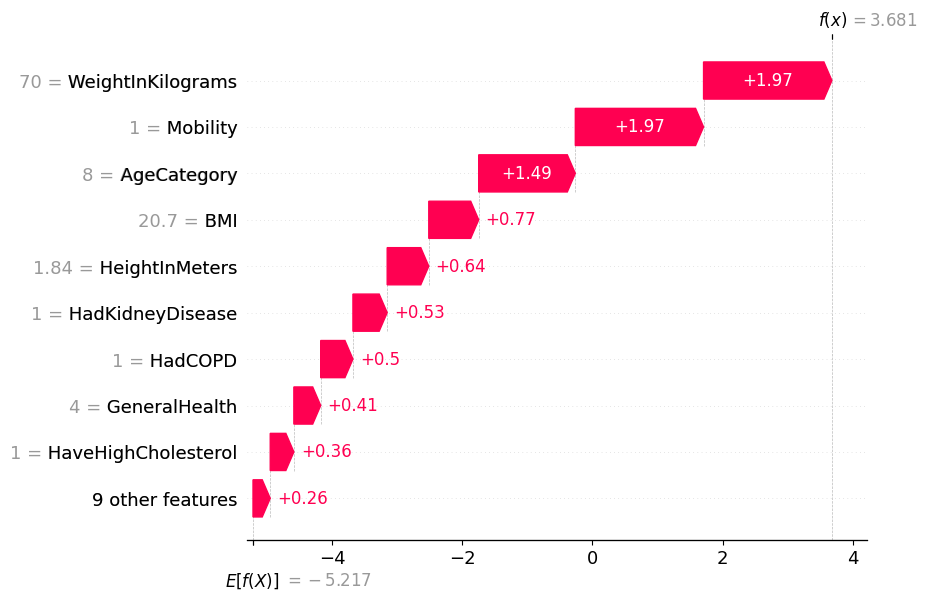

In [5]:
shap.plots.waterfall(shap_values[0])